In [1]:
import networkx as nx
import csv
import numpy as np

# create an empty directed graph
G = nx.DiGraph()

# read the data from the CSV file
with open('./Iron_dealers_data.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)  # skip the header row
    for row in reader:
        seller = int(row[0])
        buyer = int(row[1])
        value = float(row[2])
        
        # add seller and buyer as vertices if not already present
        if not G.has_node(seller):
            G.add_node(seller)
        if not G.has_node(buyer):
            G.add_node(buyer)
        
        # add the transaction as an edge with the transaction amount as the weight
        if G.has_edge(seller, buyer):
            G[seller][buyer]['weight'] += value
        else:
            G.add_edge(seller, buyer, weight=value)

In [2]:
cycle_2nodes=[]
seen_cycles=set()
for node in G.nodes:
  neighboursofnode1=set(G.successors(node))
  for neighbour in neighboursofnode1:
    if G.has_edge(node,neighbour) and G.has_edge(neighbour,node) and node!=neighbour:
      cycle=[node,neighbour]
      cycle_dup=[neighbour,node]
      if cycle_dup not in cycle_2nodes:
        cycle_2nodes.append(cycle)  

In [3]:
score_2_cycles=[]
import math
import statistics
for i in range(0,len(cycle_2nodes)):
  #each cycle
  score=-1
  node1=cycle_2nodes[i][0]
  node2=cycle_2nodes[i][1]
  edge_data = G.get_edge_data(node1, node2)
  weight12 = edge_data['weight']
  edge_data = G.get_edge_data(node2, node1)
  weight21 = edge_data['weight']
  a=weight12
  b=weight21
  max_value=b
  min_value=a
  if(a>b):
    max_value=a
  else:
    max_value=b
  if(a<b):
    min_value=a
  else:
    min_value=b
  w=[]
  w.append(a)
  w.append(b)
  avg=(a+b)/2
  x=[]
  if(max_value!=min_value):
    for i in range(0,2):
      #norm=(w[i]-min_value)/(max_value)
      norm = (w[i]) / sum([(j) for j in w])
      x.append(norm)
  #print(w)
    #print(x)
  #Compute the standard deviation of the normalized list
    w_std = statistics.stdev(x)
  else:
    w_std=0.00001  
  th=1-w_std
  #print(th)
  if(th>0.6):
    score=th*avg

  score_2_cycles.append(score)

In [4]:
len(score_2_cycles)

318

In [5]:
node_sets1 = []
seen_cycles = set()
for node in G.nodes:
    neighbors = set(G.successors(node))
    for neighbor1 in neighbors:
        for neighbor2 in neighbors:
            if neighbor1 != neighbor2 and G.has_edge(neighbor1, neighbor2):
                if G.has_edge(neighbor2, node) and G.has_edge(node, neighbor1):
                    cycle = [node, neighbor1, neighbor2]
                    if len(set(cycle)) == 3 and G.has_edge(neighbor2, neighbor1):
                        weights = [G.get_edge_data(neighbor1, neighbor2)['weight'],
                                   G.get_edge_data(neighbor2, node)['weight'],
                                   G.get_edge_data(node, neighbor1)['weight']]
                        cycle_frozen = frozenset(cycle)
                        if cycle_frozen not in seen_cycles:
                            node_sets1.append(cycle)
                            seen_cycles.add(cycle_frozen)

In [6]:
cycles_3=node_sets1
len(cycles_3)

755

In [7]:
score_3_cycles=[]
import math
import statistics
for i in range(0,len(cycles_3)):
  #each cycle
  w=[]
  score=-1
  node1=cycles_3[i][0]
  node2=cycles_3[i][1]
  node3=cycles_3[i][2]
  edge_data = G.get_edge_data(node1, node2)
  weight12 = edge_data['weight']
  edge_data = G.get_edge_data(node2, node3)
  weight23 = edge_data['weight']
  edge_data = G.get_edge_data(node3, node1)
  weight31 = edge_data['weight']
  a=weight12
  b=weight23
  c=weight31
  avg=(a+b+c)/3
  w.append(a)
  w.append(b)
  w.append(c)
  min_value = w[0] if w[0] < w[1] else w[1]
  min_value = min_value if min_value < w[2] else w[2]

  # Normalize the list
  max_value = w[0] if w[0] > w[1] else w[1]
  max_value = max_value if max_value > w[2] else w[2]

  x=[]
  w[0]=w[0]-max_value
  w[1]=w[1]-max_value
  w[2]=w[2]-max_value

  for i in range(0,3):
    #norm=(w[i]-min_value)/(max_value-min_value)
    #norm = math.exp(w[i]) / sum([math.exp(j) for j in w])
    norm  = w[i]/sum([j for j in w])
    x.append(norm)
  #print(w)
  #print(x)
  #Compute the standard deviation of the normalized list
  w_std = statistics.stdev(x)
  th=1-w_std
  #print(th)
  if(th>0.6):
    score=th*avg

  score_3_cycles.append(score)

In [8]:
len(score_3_cycles)

755

In [9]:
def my_min(x, y):
    if x < y:
        return x
    else:
        return y

def my_max(x, y):
    if x > y:
        return x
    else:
        return y

In [10]:
import hashlib

def hash_function(node1, node2):
    # Sort the nodes to ensure that (2,3) and (3,2) have the same hash value
    node_pair = f"{my_min(node1, node2)}-{my_max(node1, node2)}"

    # Hash the concatenated string using SHA-256
    hash_object = hashlib.sha256(node_pair.encode())
    hash_value = hash_object.hexdigest()

    return hash_value


# Example usage
nodes = cycles_3
scores = score_3_cycles

# Create a dictionary to store the node pair scores
node_pair_scores = {}

# Iterate over the list of nodes
for i in range(len(nodes)):
    # Iterate over the indices of the elements within each list
    for k in range(len(nodes[i])):
        # Iterate over the remaining elements in the list
        for l in range(k+1, len(nodes[i])):
            # Compute the hash value for the pair of nodes
            #print(nodes[i][k], nodes[i][l])
            hash_value = hash_function(nodes[i][k], nodes[i][l])

            # Check if the hash value already exists in the dictionary
            if hash_value in node_pair_scores:
                # If it does, add the new score to the existing value
                node_pair_scores[hash_value] += scores[i]
            else:
                # Otherwise, set the value for the hash value key to the score
                node_pair_scores[hash_value] = scores[i]

# Print the dictionary
print(len(node_pair_scores))

700


In [11]:
import hashlib

def hash_function(node1, node2):
    # Sort the nodes to ensure that (2,3) and (3,2) have the same hash value
    node_pair = f"{my_min(node1, node2)}-{my_max(node1, node2)}"

    # Hash the concatenated string using SHA-256
    hash_object = hashlib.sha256(node_pair.encode())
    hash_value = hash_object.hexdigest()

    return hash_value


# Example usage
nodes = cycle_2nodes
scores = score_2_cycles

# Create a dictionary to store the node pair scores

# Iterate over the list of nodes
for i in range(len(nodes)):
    # Compute the hash value for the pair of nodes
    #print(nodes[i][0], nodes[i][1])
    hash_value = hash_function(nodes[i][0], nodes[i][1])

    # Check if the hash value already exists in the dictionary
    if hash_value in node_pair_scores:
        # If it does, add the new score to the existing value
        node_pair_scores[hash_value] += scores[i]
    else:
        # Otherwise, set the value for the hash value key to the score
        node_pair_scores[hash_value] = scores[i]

# Print the dictionary
print(len(node_pair_scores))

743


In [12]:
G_un = nx.Graph()


# read the data from the CSV file
with open('./Iron_dealers_data.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)  # skip the header row
    for row in reader:
        seller = int(row[0])
        buyer = int(row[1])
        #value = float(row[2])
        
        # add seller and buyer as vertices if not already present
        if not G_un.has_node(seller):
            G_un.add_node(seller)
        if not G_un.has_node(buyer):
            G_un.add_node(buyer)
        
        # add the transaction as an edge with the transaction amount as the weight
        if G_un.has_edge(seller, buyer):
            G_un[seller][buyer]['weight'] = -1
        else:
            G_un.add_edge(seller, buyer, weight= -1)

In [13]:
print(G_un)

Graph with 799 nodes and 5040 edges


In [14]:
for u,v in G_un.edges():
  key=hash_function(u,v)
  key=str(key)
  if key in node_pair_scores:
    G_un[u][v]['weight']+= node_pair_scores[key]


In [15]:
max_weight = float('-inf')
min_weight = float('inf')
count = 0
negative_weight_nodes = set()

for edge in G_un.edges():
    node1 = edge[0]
    node2 = edge[1]
    weight = G_un.get_edge_data(node1, node2)['weight']
    if(weight != -1):
        count = count + 1
        if weight > max_weight:
            max_weight = weight
        if weight < min_weight:
            min_weight = weight
        if weight < 0:
            negative_weight_nodes.add(node1)
            negative_weight_nodes.add(node2)

print(f"Maximum weight: {max_weight}")
print(f"Minimum weight: {min_weight}")
print(f"Number of non-negative weights: {count}")
print(f"Nodes with negative weights: {negative_weight_nodes}")
print(len(negative_weight_nodes))
print(G_un)

Maximum weight: 1572416926.2798965
Minimum weight: -3
Number of non-negative weights: 743
Nodes with negative weights: {1027, 1034, 1035, 1037, 1040, 1041, 1043, 1049, 1054, 1056, 1072, 1074, 1076, 1080, 1089, 1096, 1098, 1099, 1101, 1105, 1108, 1114, 1632, 1640, 1129, 1130, 1133, 1136, 1138, 1140, 1141, 1147, 1148, 1149, 1155, 1163, 1676, 1166, 1173, 1175, 1179, 1181, 1189, 1194, 1197, 1199, 1201, 1204, 1217, 1222, 1226, 1235, 1242, 1246, 1249, 1282, 1283, 1296, 1298, 1306, 1308, 1309, 1310, 1317, 1319, 1327, 1330, 1339, 1341, 1342, 1356, 1364, 1370, 1375, 1377, 1379, 1381, 1406, 1433, 1439, 1510, 1002, 1007, 1011, 1523, 1014, 1016, 1020, 1021, 1023}
90
Graph with 799 nodes and 5040 edges


In [16]:
!pip install node2vec

In [17]:
import networkx as nx
from node2vec import Node2Vec


# create an example undirected graph
G = G_un


node2vec = Node2Vec(G, dimensions=4, walk_length=10, num_walks=200, weight_key='weight', p=1, q=0.5)


# generate embeddings using the Node2Vec object
model = node2vec.fit(window=5, min_count=1)


# get the embeddings for all nodes in the graph
embeddings = {str(node): model.wv[str(node)] for node in G.nodes()}

Computing transition probabilities:   0%|          | 0/799 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [00:12<00:00, 15.67it/s]


C:\Users\paris\AppData\Local\Temp\ipykernel_22436\4234430637.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)  # choose a colormap
C:\Users\paris\AppData\Local\Temp\ipykernel_22436\4234430637.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X[labels==label, 0], X[labels==label, 1], c=color, alpha=0.5, label=f'class {label+1} of fraudsters')


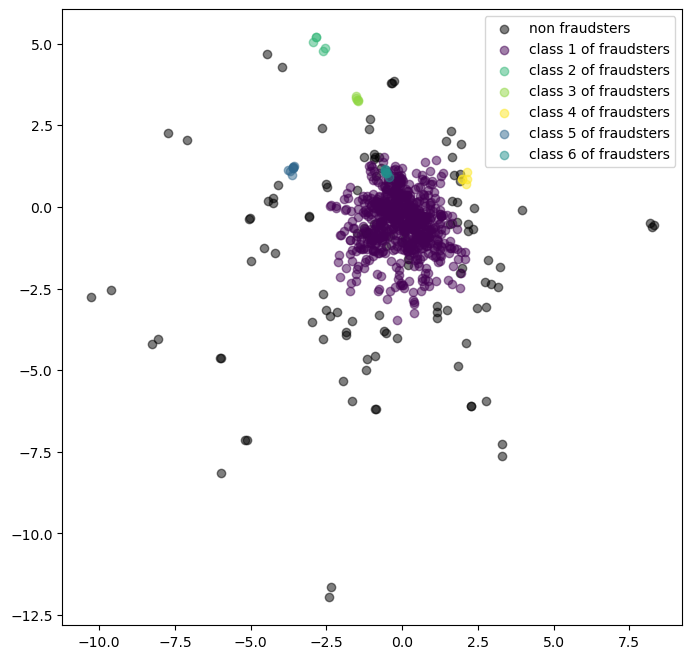

In [18]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# convert the embeddings dictionary to a numpy array
X = np.array(list(embeddings.values()))

# apply DBSCAN clustering
db = DBSCAN(eps=0.8, min_samples=5).fit(X)
labels = db.labels_

# count the number of points in each cluster
unique_labels, label_counts = np.unique(labels, return_counts=True)
label_counts_dict = dict(zip(unique_labels, label_counts))

# sort the clusters based on their density (number of points)
sorted_labels = sorted(unique_labels, key=lambda x: label_counts_dict[x], reverse=True)

# assign colors to the clusters
n_clusters = len(unique_labels)
cmap = plt.cm.get_cmap('viridis', n_clusters)  # choose a colormap
colors = [cmap(i/n_clusters) for i in range(n_clusters)]
cluster_colors = dict(zip(sorted_labels, colors))

# plot the clusters
fig, ax = plt.subplots(figsize=(8,8))
for label in np.unique(labels):
    if label == -1:
        # plot noise points in black
        ax.scatter(X[labels==label, 0], X[labels==label, 1], c='k', alpha=0.5,label='non fraudsters')
    else:
        # plot the points in the cluster with the assigned color
        color = cluster_colors[label]
        ax.scatter(X[labels==label, 0], X[labels==label, 1], c=color, alpha=0.5, label=f'class {label+1} of fraudsters')
ax.legend()
plt.show()

In [19]:
# get the embeddings as a list
embedding_list = list(embeddings.values())

# get the nodes in each label
nodes_by_label = {}
for label in np.unique(labels):
    nodes = [node for node, embedding in embeddings.items() if np.any(np.all(np.array(embedding) == np.array(embedding_list)[labels == label], axis=1))]
    nodes_by_label[label] = nodes

# print the nodes in each label
for label, nodes in nodes_by_label.items():
    print(f"Nodes in label {label}: {nodes}")

Nodes in label -1: ['1045', '1018', '1595', '1148', '1159', '1077', '1087', '1080', '1014', '1209', '1215', '1065', '1390', '1939', '1114', '1475', '1179', '1818', '1066', '1330', '1024', '1064', '1640', '1133', '1025', '1248', '1262', '1033', '1771', '1772', '1067', '1244', '1849', '2061', '1118', '1239', '1115', '1451', '1227', '1314', '1094', '1122', '1499', '1710', '1626', '1092', '2136', '1454', '1298', '2172', '1518', '1318', '1357', '1975', '1055', '1758', '1043', '1250', '1986', '1381', '1355', '1305', '1102', '1444', '1226', '1249', '1313', '1395', '1725', '1731', '1266', '1460', '1874', '1800', '1333', '2093', '1369', '1899', '1498', '1614', '1879', '1457', '1354', '1549', '2021', '1596', '1437', '1203', '1312', '1644', '1097', '1600', '1385', '1325', '1367', '1980', '1493', '1304', '1410', '1588', '1873', '1572', '1376', '1495', '1176', '1571', '1425', '1530', '1225', '1047', '1688', '2169', '1925', '1453']
Nodes in label 0: ['1309', '1011', '1259', '1568', '1147', '1393', '